# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
from numpy import percentile
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'whitegrid')

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
dice = range(1,7)
roll = []
for i in range(10):
    roll.append(random.choice(dice))
dice_df = pd.DataFrame({'dice_number' : roll})
dice_df

,dice_number
0,1
1,5
2,1
3,5
4,2
5,4
6,4
7,3
8,4
9,6


#### 2.- Plot the results sorted by value.

Text(0.5, 1.0, 'Dice numbers rolled')

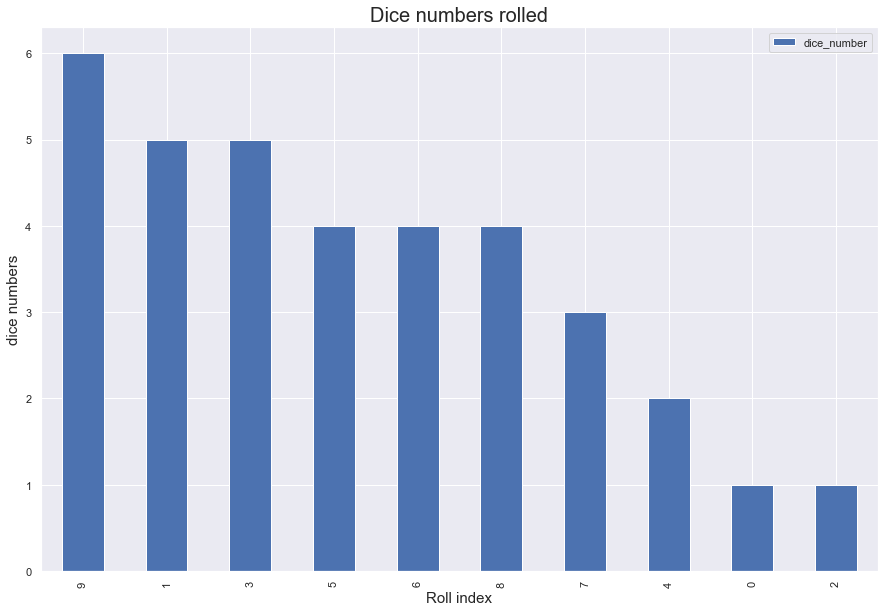

In [3]:
# your code here
new_dice = dice_df.sort_values(by=['dice_number'],ascending=False)
sns.set(rc={'figure.figsize':(15,10)})
new_dice.plot.bar()
plt.xlabel("Roll index",fontsize=15)
plt.ylabel("dice numbers",fontsize=15)
plt.title("Dice numbers rolled",fontsize = 20)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

Text(0.5, 1.0, 'Frequency distribution plot for dice numbers')

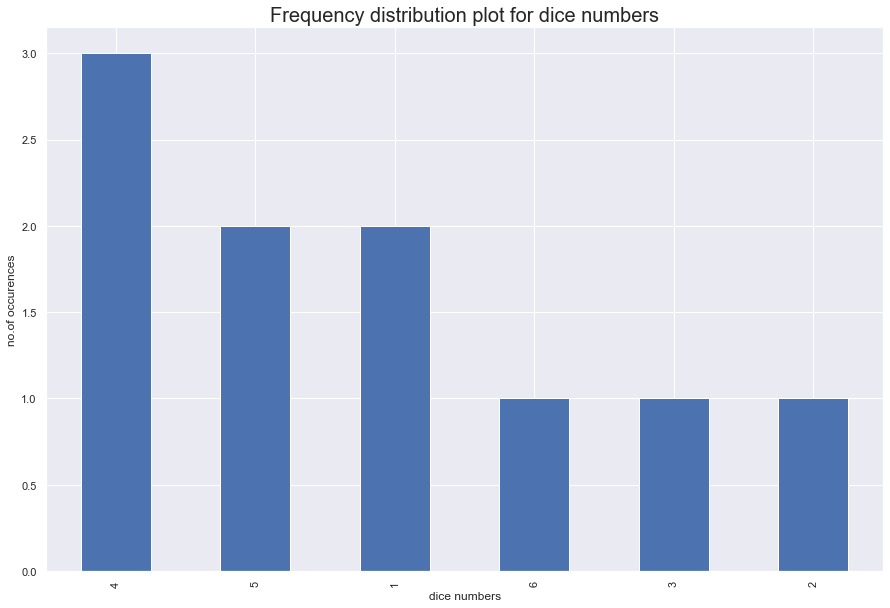

In [4]:
# your code here
fig, ax = plt.subplots()
dice_df['dice_number'].value_counts().plot(ax=ax, kind='bar')
plt.xlabel("dice numbers")
plt.ylabel("no.of occurences")
plt.title("Frequency distribution plot for dice numbers", fontsize = 20)

In [5]:
"""
The first plot shows the dice numbers displayed (sorted order) in individual roll event.
While second plot also shows dice numbers, but the no.of times(occurences/frequency)they came up in the whole event.
"""

'\nThe first plot shows the dice numbers displayed (sorted order) in individual roll event.\nWhile second plot also shows dice numbers, but the no.of times(occurences/frequency)they came up in the whole event.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean(df):
    return df.sum()/len(df)
mean(dice_df)

dice_number    3.5
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
freq = pd.DataFrame(dice_df['dice_number'].value_counts())
dice_df_mean = dice_df['dice_number'].sum()/freq.sum()
dice_df_mean
"""Mean is same as before"""

'Mean is same as before'

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here
def median(df,column):
    mid = ((len(df[column])) / 2)
    if len(df[column]) % 2 == 0:
        return (mid + (mid -1)) / 2
    else:
        return mid
median(new_dice, 'dice_number')


4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here
def quartiles (df, column):
    df = df.sort_values(column)
    Q1 = df.iloc[int(len(df[column])/4)][column]
    Q2 = median(df, column)
    Q3 = df.iloc[-int(len(df[column])/4)][column]
    return print([Q1, Q2, Q3])

quartiles(new_dice, 'dice_number')

[2, 4.5, 5]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

In [10]:
# your code here
dice_df = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_df = dice_df.drop('Unnamed: 0', axis = 1)
dice_df.head()

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6


<AxesSubplot:xlabel='roll'>

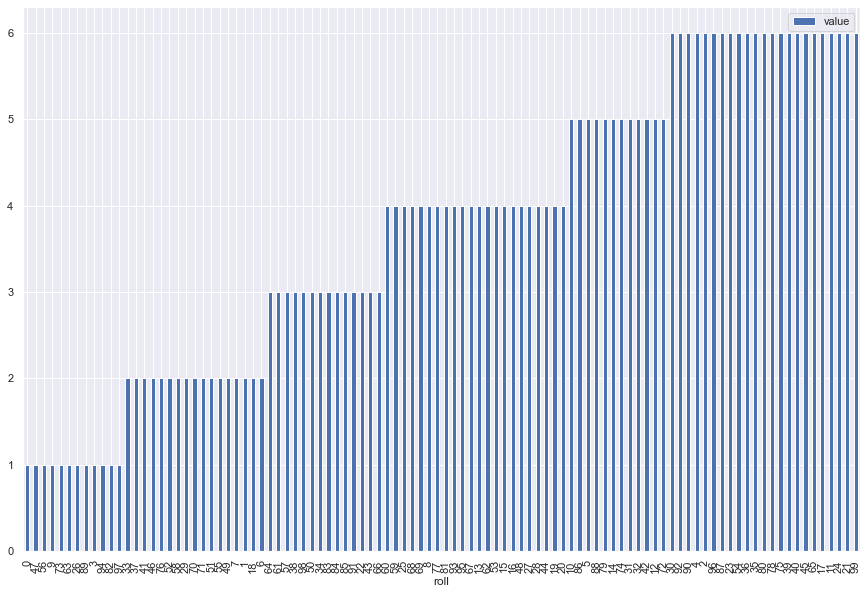

In [11]:
dice_df_sorted = dice_df[['roll', 'value']].sort_values(by = 'value', ascending = True)
dice_df_sorted.plot.bar(x = 'roll', y = 'value')

In [12]:
"""
6 is the most frequently occured outcome followed by 4
"""

'\n6 is the most frequently occured outcome followed by 4\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
# your code here
print(mean(dice_df))


roll     49.50
value     3.74
dtype: float64


#### 3.- Now, calculate the frequency distribution.


In [14]:
# your code here
freq_data = dice_df['value'].value_counts()
freq_data

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

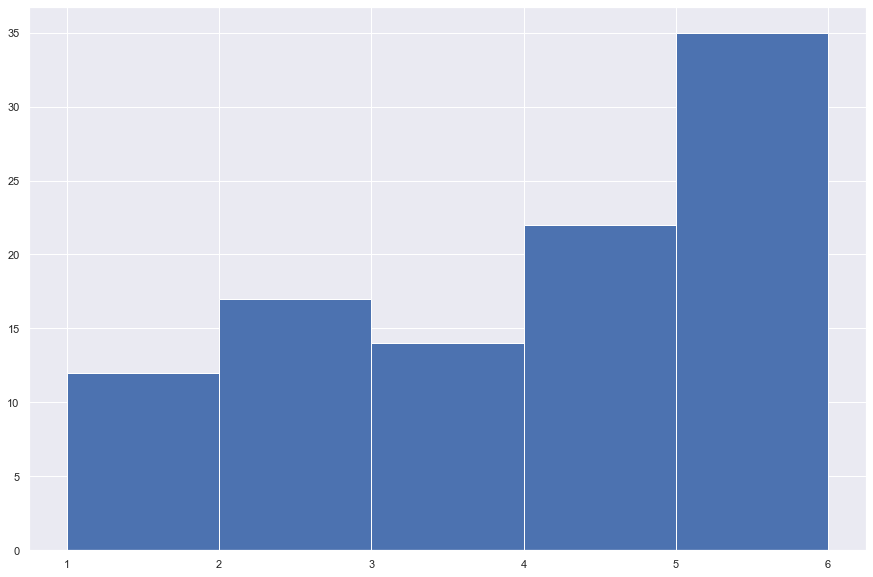

In [15]:
# your code here
dice_df_sorted.value.hist(bins=5)

In [16]:
"""
Frequency of outcome for all the dice numbers becomes more evenly distributed
as the no.of events(rolling the dice) are increased.
"""

'\nFrequency of outcome for all the dice numbers becomes more evenly distributed\nas the no.of events(rolling the dice) are increased.\n'

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

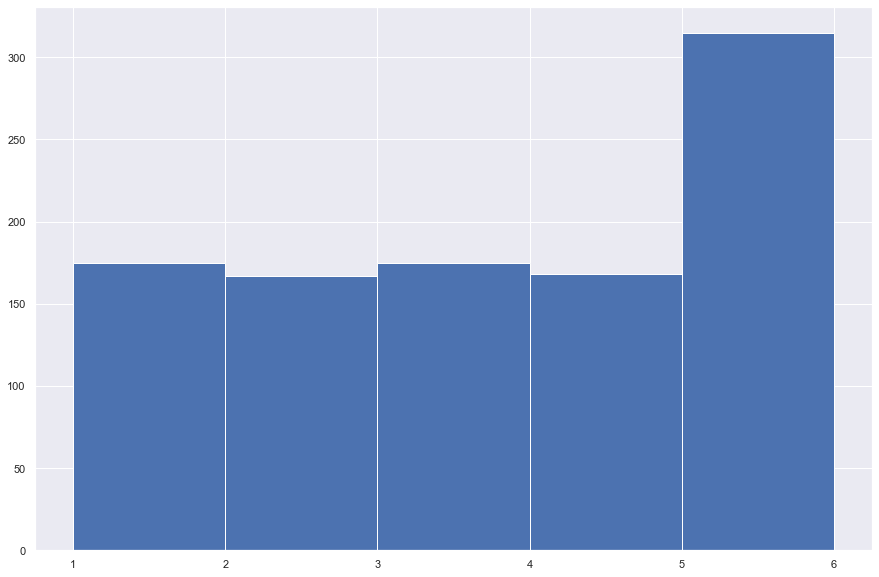

In [17]:
# your code here
data_1000=pd.read_csv('../data/roll_the_dice_thousand.csv')
data_1000_sort = data_1000.sort_values(by='value',ascending=False)
data_1000_sort.value.hist(bins=5)

In [18]:
"""
Frequency of outcome for all the dice numbers becomes more evenly distributed
as the no.of events(rolling the dice) are increased.
"""

'\nFrequency of outcome for all the dice numbers becomes more evenly distributed\nas the no.of events(rolling the dice) are increased.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [19]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [20]:
print(ages.mean(),ages.observation.std())

observation    36.56
dtype: float64 12.816499625976762


C:\Users\P. Scalia\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


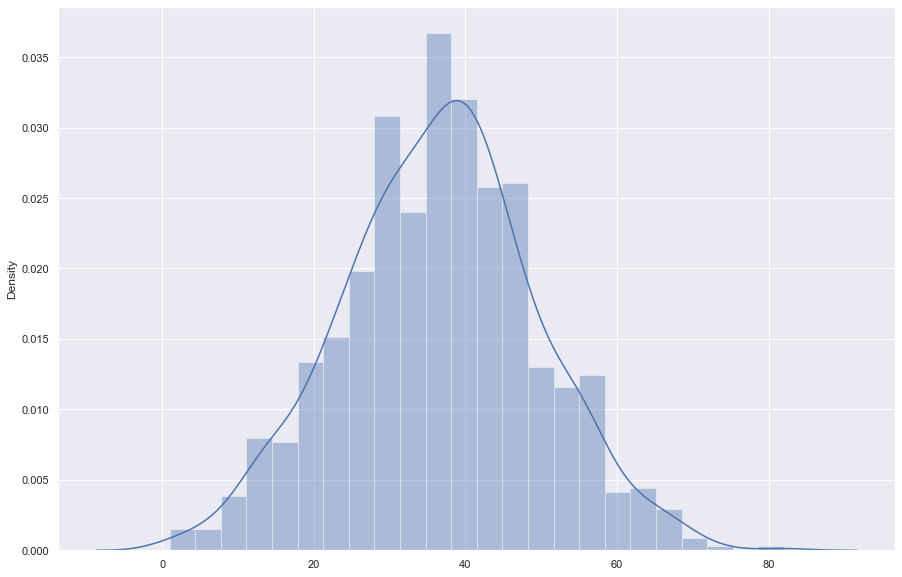

In [21]:
# your code here
sns.distplot(ages)
plt.show()

In [22]:
"""
From this plot it can be seen that the count of elder people (ages >60) went up here which caused the mean and deviation value
to go higher compared to the first plot.
"""

'\nFrom this plot it can be seen that the count of elder people (ages >60) went up here which caused the mean and deviation value\nto go higher compared to the first plot.\n'

#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

   observation
0         25.0
1         31.0
2         29.0
3         31.0
4         29.0


C:\Users\P. Scalia\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


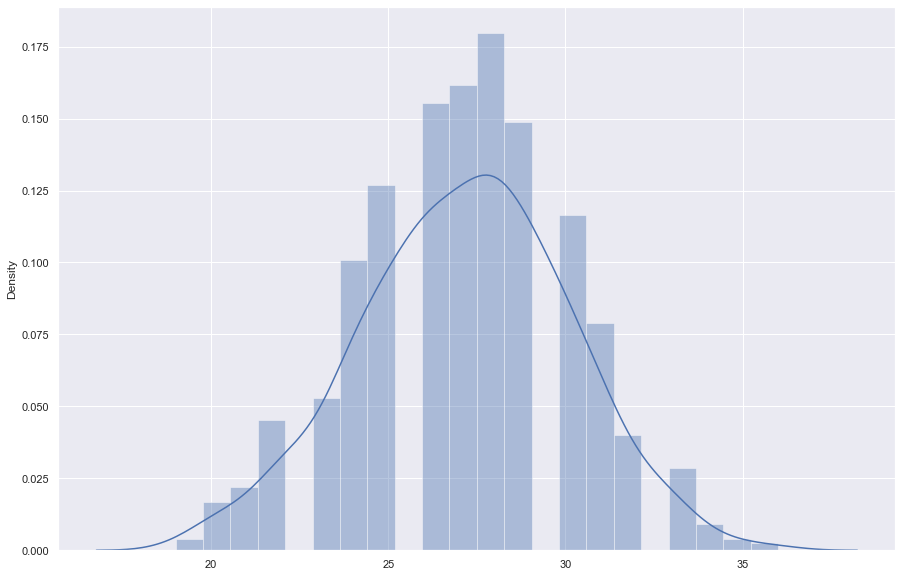

In [23]:
# your code here
ages_2 = pd.read_csv('../data/ages_population2.csv')
print(ages_2.head())
sns.distplot(ages_2)
plt.show()


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [24]:
"""
In this neighbourhood ages are between 15-35 instead of 0-80
"""

'\nIn this neighbourhood ages are between 15-35 instead of 0-80\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [25]:
# your code here
print(ages_2.mean())
print(ages_2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [26]:
"""
Mean is different because  of smaller age group. Std dev low because of  smaller age group

"""

'\nMean is different because  of smaller age group. Std dev low because of  smaller age group\n\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

C:\Users\P. Scalia\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


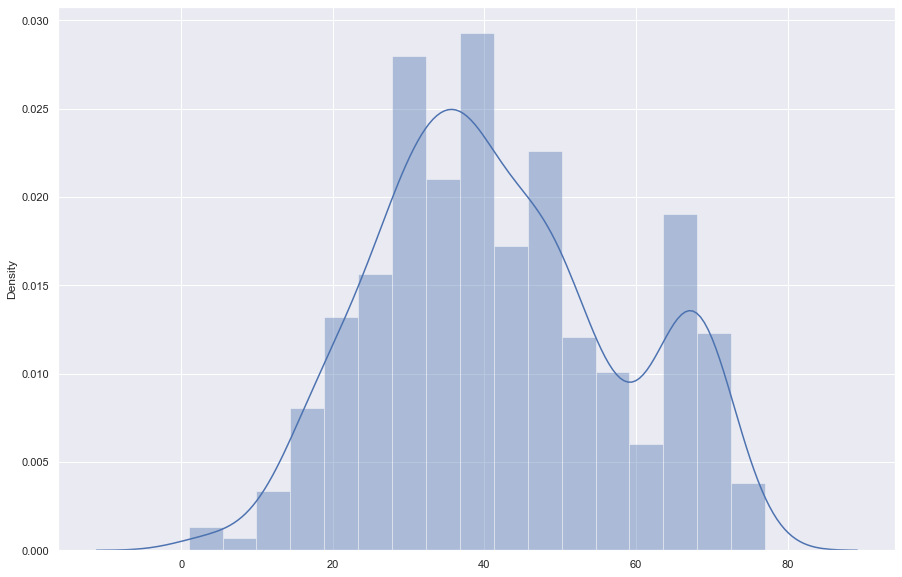

In [27]:
# your code here
ages_3 = pd.read_csv('../data/ages_population3.csv')
sns.distplot(ages_3)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [28]:
# your code here

print(ages_3.mean())
print(ages_3.std())


observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [29]:
"""
Neighbourhoud with also bigger group with older people. Therefore mean goes up and std dev is higher
"""

'\nNeighbourhoud with also bigger group with older people. Therefore mean goes up and std dev is higher\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [30]:
# your code here
ages_3.quantile([0.25, 0.5, 0.75, 1])

,observation
0.25,30.0
0.50,40.0
0.75,53.0
1.00,77.0


In [31]:
"""
Median is lower than mean, meaning right skew. So more values to right of graph
"""

'\nMedian is lower than mean, meaning right skew. So more values to right of graph\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [32]:
# your code here
print(ages_3.quantile(0.80))
print(ages_3.quantile(0.85))
print(ages_3.quantile(0.90))

observation    57.0
Name: 0.8, dtype: float64
observation    64.0
Name: 0.85, dtype: float64
observation    67.0
Name: 0.9, dtype: float64


In [33]:
"""
10% of people are older than 67
15% of people are older than 64
20% of people are older than 57
"""

'\n10% of people are older than 67\n15% of people are older than 64\n20% of people are older than 57\n'

In [36]:
#paolo: check

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [34]:
# your code here

In [35]:
"""
your comments here
"""

'\nyour comments here\n'